In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math

plt.rcParams.update({
    "figure.facecolor": (1,1,1,1),
    "axes.facecolor": (1,1,1,1),
    "savefig.facecolor": (1,1,1,1)
})

from matplotlib.ticker import ScalarFormatter
import datetime

Spring 2025 Data Points: 623734
Fall 2024 Data Points: 229170
Index(['Millis', 'PCF8523 Year', 'PCF8523 Month', 'PCF8523 Day',
       'PCF8523 Hour', 'PCF8523 Minute', 'PCF8523 Second',
       'INA260 Current (mA)', 'INA260 Voltage (mV)', 'INA260 Power (mW)',
       'PicoTemp Temp (C)', 'ICM20948 AccX (g)', 'ICM20948 AccY (g)',
       'ICM20948 AccZ (g)', 'ICM20948 GyroX (deg/s)', 'ICM20948 GyroY (deg/s)',
       'ICM20948 GyroZ (deg/s)', 'ICM20948 MagX (uT)', 'ICM20948 MagY (uT)',
       'ICM20948 MagZ (uT)', 'ICM20948 Temp (C)', 'MTK3339 Year',
       'MTK3339 Month', 'MTK3339 Day', 'MTK3339 Hour', 'MTK3339 Minute',
       'MTK3339 Second', 'MTK3339 Latitude', 'MTK3339 Longitude',
       'MTK3339 Speed', 'MTK3339 Heading', 'MTK3339 Altitude',
       'MTK3339 Satellites', 'BMP390 Temp (C)', 'BMP390 Pressure (Pa)',
       'BMP390 Altitude (m)', 'TMP117 Temp (C)', 'SHTC3 Temp (C)',
       'SHTC3 Rel Hum (%)', 'SCD40 CO2 Conc (ppm)', 'SCD40 Temp (C)',
       'SCD40 Rel Hum (%)', 'ENS160 

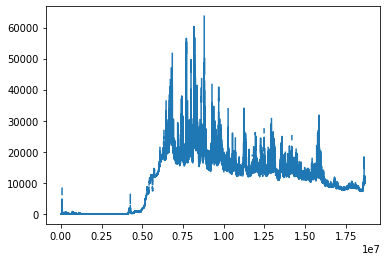

In [17]:
flash_df = pd.read_csv(os.path.join("..","Spring2025Data","ASCEND_flash_data_file_4_04_03_20_02_43.csv"))

custom_na = pd._libs.parsers.STR_NA_VALUES
custom_na.add("-")
old_flash_df = pd.read_csv(os.path.join("..", "Fall2024Data", "ASCEND_DATA_2024_11_25_19_13_57.csv"), na_values=custom_na)

points_flash_df = sum(flash_df.count())
old_points_flash_df = sum(old_flash_df.count())

print("Spring 2025 Data Points:", points_flash_df)
print("Fall 2024 Data Points:", old_points_flash_df)

flash_df["ENS160_O AQI_O"]

print(flash_df.columns)

plt.plot(flash_df["Millis"], flash_df["ENS160_O TVOC_O (ppb)"])

plt.show()

In [3]:
from tabulate import tabulate
from IPython.display import HTML, display

# datarate 
row_count = len(flash_df["Millis"])
millis_dur = flash_df["Millis"][row_count-1] - flash_df["Millis"][0]
sample_period = round((millis_dur/1000) / row_count, 4)

ignores = [] #["Receive time", "Header"]
sample_counts = list(flash_df.count())

print("Data Collection Stats:")
print("Recorded", len(flash_df["Millis"]), "rows", end=" ")
print("over", round(millis_dur / 1000 / 60, 2), "minutes")
print(len(flash_df.columns), "columns per row")
print(sum(sample_counts), "data points")
print()
print("Overall Sample Period:", sample_period, "seconds")
print("Overall Sample Frequency:", round(1/sample_period, 4), "Hz")
print()

table_list = [["Data Name", "Number of Samples", "Average Sample Frequency (Hz)", "Average Sample Period (s)", "Best Sample Period (s)", "Worst Sample Period (s)"]]

print("Analyzing Data", end="")
for i, col in enumerate(list(flash_df.columns)):
    if sample_counts[i] == 0 or (col in ignores): continue
    best_period = 10000
    worst_period = 0
    # find them
    last_found = -1
    print(".", end="")
    for r, val in enumerate(flash_df[col]):
        if str(val) != "nan":
            if last_found != -1:
                this_period = flash_df["Millis"][r] - last_found
#                 if(best_period != min(best_period, this_period)): print(original_flash_df["Millis"][r], best_period)
                best_period = min(best_period, this_period)
                worst_period = max(worst_period, this_period)
            last_found = flash_df["Millis"][r]
    best_period /= 1000
    worst_period /= 1000
            
    average_period = (millis_dur / 1000) / sample_counts[i] 
    average_frequency = 1 / average_period 
    
    entry = [col, sample_counts[i], round(average_frequency, 3), round(average_period, 3), best_period, worst_period]
    
    table_list.append(entry)

table_list.append(["By Device Average"] + [round(np.mean([table_list[i][j] for i in range(1, len(table_list))]), 3) for j in range(1, len(table_list[0]))])
table_list.append(["By Device Min"] + [round(np.min([table_list[i][j] for i in range(1, len(table_list))]), 3) for j in range(1, len(table_list[0]))])
table_list.append(["By Device Max"] + [round(np.max([table_list[i][j] for i in range(1, len(table_list))]), 3) for j in range(1, len(table_list[0]))])


print("Done.")


Data Collection Stats:
Recorded 18683 rows over 311.35 minutes
58 columns per row
623734 data points

Overall Sample Period: 0.9999 seconds
Overall Sample Frequency: 1.0001 Hz

Analyzing Data.................................................Done.


In [4]:
table_html = tabulate(
    table_list,
    tablefmt="html",
    headers="firstrow"
)

display(HTML(table_html))

Data Name,Number of Samples,Average Sample Frequency (Hz),Average Sample Period (s),Best Sample Period (s),Worst Sample Period (s)
Millis,18683,1,1,0.719,1.647
PCF8523 Year,12454,0.667,1.5,1.386,2.312
PCF8523 Month,12454,0.667,1.5,1.386,2.312
PCF8523 Day,12454,0.667,1.5,1.386,2.312
PCF8523 Hour,12454,0.667,1.5,1.386,2.312
PCF8523 Minute,12454,0.667,1.5,1.386,2.312
PCF8523 Second,12454,0.667,1.5,1.386,2.312
INA260 Current (mA),12454,0.667,1.5,1.386,2.312
INA260 Voltage (mV),12454,0.667,1.5,1.386,2.312
INA260 Power (mW),12454,0.667,1.5,1.386,2.312
